## Jubilee Data Project

In [226]:
import unicodecsv
from collections import OrderedDict

with open('videodata.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    videos = list(reader)

In [227]:
print(videos[0]['video_created'])
print(videos[1]['video_created'])
print(videos[2]['video_created'])

print(videos[0]['% subscriber conversion'])
print(videos[1]['% subscriber conversion'])
print(videos[2]['% subscriber conversion'])

5/7/2017
5/14/2017
5/16/2017
0.1523%
0.1240%
0.2099%


In [228]:
videos[0]

OrderedDict([('video_title', '100 Humans: What Do You Love About Yourself?'),
             ('video_id', 'CJN-D6kdvws'),
             ('series', '100 Humans'),
             ('video_length_minutes', '2.47'),
             ('video_created', '5/7/2017'),
             ('views', '104,404'),
             ('subscribers_gained', '159'),
             ('subscriber conversion', '656.63'),
             ('% subscriber conversion', '0.1523%'),
             ('average_view_duration', '1.8'),
             ('watch_time_minutes', '191746'),
             ('% average_percentage_viewed', '74.46%'),
             ('card_clicks', '2'),
             ('cards_shown', '5'),
             ('clicks_per_card_shown', '40'),
             ('% clicks_per_card_shown', '40.00%'),
             ('card_teaser_clicks', '5'),
             ('card_teasers_shown', '3246'),
             ('clicks_per_card_teaser_shown', '0.15'),
             ('% clicks_per_card_teaser_shown', '0.15%'),
             ('end_screen_elements_shown', '117839

In [229]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%m/%d/%Y')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_float(f):
    if f == '':
        return None
    else:
        return float(f.replace(',',''))

# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_int(i):
    if i == '':
        return None
    else:
        return int(i.replace(',',''))
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.

def parse_percentage(p):
    if p == '':
        return None
    else:
        return float(p.strip('%'))/100

In [230]:
## Cleanup on extra rows that are not needed

for v in videos:
    v.pop('clicks_per_card_shown',None)
    v.pop('clicks_per_card_teaser_shown',None)
    v.pop('clicks_per_end_screen_element_shown',None)
    v.pop('subscriber conversion',None)
    v.pop('average_percentage_viewed',None)
    v.pop("",None)
    


In [231]:
# TODO

# Clean up the data types in the video table
for video in videos:
    video['video_length_minutes'] = parse_float(video['video_length_minutes'])    
    video['video_created'] = parse_date(video['video_created'])
    video['views'] = parse_int(video['views'])
    video['subscribers_gained'] = parse_int(video['subscribers_gained'])
    video['% subscriber conversion'] = parse_percentage(video['% subscriber conversion'])
    video['average_view_duration'] = parse_float(video['average_view_duration'])
    video['watch_time_minutes'] = parse_int(video['watch_time_minutes'])
    video['% average_percentage_viewed'] = parse_percentage(video['% average_percentage_viewed'])
    video['card_clicks'] = parse_int(video['card_clicks'])
    video['cards_shown'] = parse_int(video['cards_shown'])
    video['% clicks_per_card_shown'] = parse_percentage(video['% clicks_per_card_shown'])
    video['card_teaser_clicks'] = parse_int(video['card_teaser_clicks'])
    video['card_teasers_shown'] = parse_int(video['card_teasers_shown'])
    video['% clicks_per_card_teaser_shown'] = parse_percentage(video['% clicks_per_card_teaser_shown'])
    video['end_screen_elements_shown'] = parse_int(video['end_screen_elements_shown'])
    video['end_screen_element_clicks'] = parse_int(video['end_screen_element_clicks'])
    video['% clicks_per_end_screen_element_shown'] = parse_percentage(video['% clicks_per_end_screen_element_shown'])
    video['estimated_monetized_playbacks'] = parse_int(video['estimated_monetized_playbacks'])
    video['ad_impressions'] = parse_int(video['ad_impressions'])
    video['youtube_red_watch_time_hours'] = parse_int(video['youtube_red_watch_time_hours'])
    video['annotation_clicks'] = parse_int(video['annotation_clicks'])
    video['clickable_annotations_shown'] = parse_int(video['clickable_annotations_shown'])
    
    ## Potential Weird Behavior bc no % sign 
    ## EDIT: Looks good
    video['annotation_click_through_rate'] = parse_percentage(video['annotation_click_through_rate'])
    
    video['annotation_closes'] = parse_int(video['annotation_closes'])
    video['closable_annotations_shown'] = parse_int(video['closable_annotations_shown'])
    video['annotation_close_rate'] = parse_float(video['annotation_close_rate'])
    video['annotations_shown'] = parse_int(video['annotations_shown'])
    video['likes'] = parse_int(video['likes'])
    video['likes_added'] = parse_int(video['likes_added'])
    video['likes_removed'] = parse_int(video['likes_removed'])
    video['dislikes'] = parse_int(video['dislikes'])
    video['dislikes_added'] = parse_int(video['dislikes_added'])
    video['dislikes_removed'] = parse_int(video['dislikes_removed'])
    video['shares'] = parse_int(video['shares'])
    video['comments'] = parse_int(video['comments'])
    video['videos_in_playlists'] = parse_int(video['videos_in_playlists'])
    video['videos_added_to_playlists'] = parse_int(video['videos_added_to_playlists'])
    video['videos_removed_from_playlists'] = parse_int(video['videos_removed_from_playlists'])
    video['watch_time_hours'] = parse_int(video['watch_time_hours'])


In [232]:
## Adding extra rows that I'm interested in

for v in videos:
    
    ## Engagement
    v['total_engagement'] = v['likes']+v['dislikes']+v['shares']+v['comments']
    v['positive_engagement'] = v['likes']+v['shares']+v['comments']
    v['comments_shares'] = v['shares']+v['comments']
    v['like_ratio'] = round(v['likes']/(v['likes']+v['dislikes']),4)
    
    ## Engagement to View Ratio    
    v['total_engagement_to_views'] = round((v['likes']+v['dislikes']+v['shares']+v['comments'])/v['views'],4)
    v['positive_engagement_to_views'] = round((v['likes']+v['shares']+v['comments'])/v['views'],4)
    v['comments_shares_to_views'] = round((v['shares']+v['comments'])/v['views'],4)
    
    ## Video Count for counting purposes
    v['vid_count'] = 1

In [233]:
videos[2]

OrderedDict([('video_title',
              'Couple Secretly Shares Each Side Of Their Love Story'),
             ('video_id', '638ZHX2CA0g'),
             ('series', 'Both Sides'),
             ('video_length_minutes', 8.48),
             ('video_created', datetime.datetime(2017, 5, 16, 0, 0)),
             ('views', 4141770),
             ('subscribers_gained', 8692),
             ('% subscriber conversion', 0.002099),
             ('average_view_duration', 4.7),
             ('watch_time_minutes', 19306829),
             ('% average_percentage_viewed', 0.5495),
             ('card_clicks', 26),
             ('cards_shown', 199),
             ('% clicks_per_card_shown', 0.1307),
             ('card_teaser_clicks', 96),
             ('card_teasers_shown', 63405),
             ('% clicks_per_card_teaser_shown', 0.0015),
             ('end_screen_elements_shown', 2577377),
             ('end_screen_element_clicks', 75228),
             ('% clicks_per_end_screen_element_shown', 0.0292),
 

In [234]:
# Store all column names

video_cols = []
for k,v in videos[0].items():
    video_cols.append(k)

print(video_cols)

['video_title', 'video_id', 'series', 'video_length_minutes', 'video_created', 'views', 'subscribers_gained', '% subscriber conversion', 'average_view_duration', 'watch_time_minutes', '% average_percentage_viewed', 'card_clicks', 'cards_shown', '% clicks_per_card_shown', 'card_teaser_clicks', 'card_teasers_shown', '% clicks_per_card_teaser_shown', 'end_screen_elements_shown', 'end_screen_element_clicks', '% clicks_per_end_screen_element_shown', 'estimated_monetized_playbacks', 'ad_impressions', 'youtube_red_watch_time_hours', 'annotation_clicks', 'clickable_annotations_shown', 'annotation_click_through_rate', 'annotation_closes', 'closable_annotations_shown', 'annotation_close_rate', 'annotations_shown', 'likes', 'likes_added', 'likes_removed', 'dislikes', 'dislikes_added', 'dislikes_removed', 'shares', 'comments', 'videos_in_playlists', 'videos_added_to_playlists', 'videos_removed_from_playlists', 'watch_time_hours', 'total_engagement', 'positive_engagement', 'comments_shares', 'like_

In [235]:
## Descriptive Stats

def describe_data(data, x_axis = "", y_axis = ""):
    print('Mean:', np.mean(data))
    print('Max: ', np.max(data))
    print('Min: ', np.min(data))
    print('Std: ', np.std(data))
    plt.hist(data)
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)

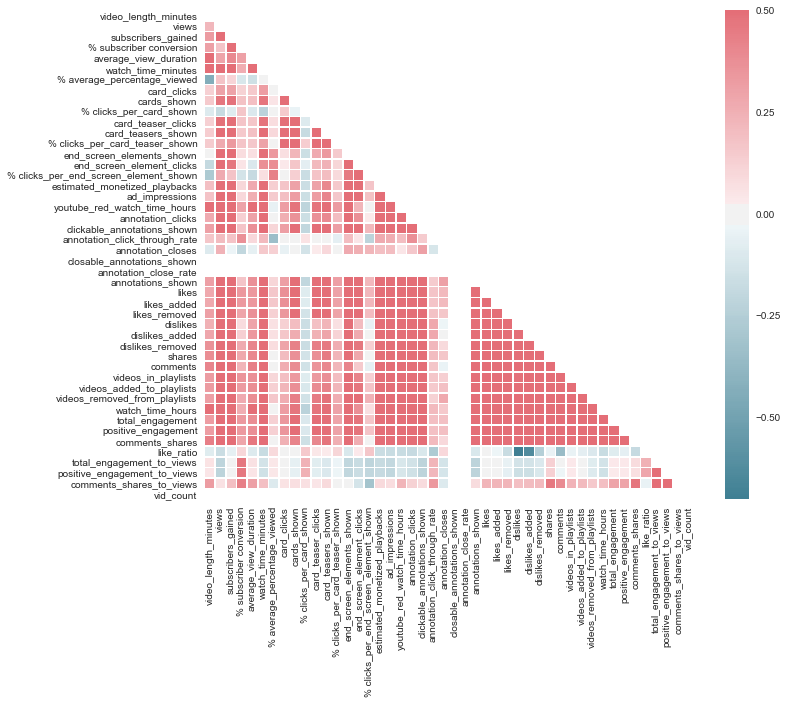

In [236]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from string import ascii_letters

sns.set(style="white")

d = pd.DataFrame(data=videos,columns=video_cols)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center= 0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1})

In [237]:
## Storing all values for one attribute in dictionary
like_ratio_list = []
total_engagement_to_views_list = []
positive_engagement_to_views_list = []
comments_shares_to_views_list = []

## Populating list
for v in videos:
    like_ratio_list.append(v['like_ratio'])
    total_engagement_to_views_list.append(v['total_engagement_to_views'])
    positive_engagement_to_views_list.append(v['positive_engagement_to_views'])
    comments_shares_to_views_list.append(v['comments_shares_to_views'])


Mean: 0.9783739495798318
Max:  0.9976
Min:  0.759
Std:  0.028320585090407368


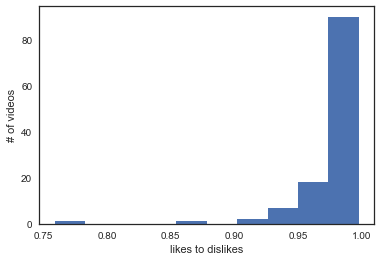

In [238]:
describe_data(like_ratio_list, 'likes to dislikes','# of videos')

Mean: 0.03631932773109243
Max:  0.1004
Min:  0.0111
Std:  0.016281325474663298


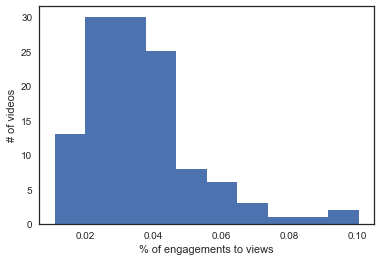

In [239]:
describe_data(total_engagement_to_views_list, '% of engagements to views', '# of videos')

Mean: 0.035770588235294117
Max:  0.1001
Min:  0.0107
Std:  0.016318785138406445


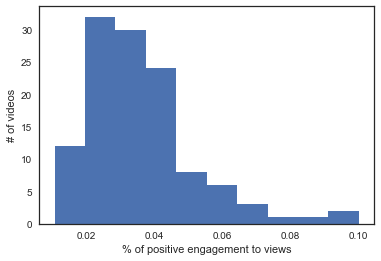

In [240]:
describe_data(positive_engagement_to_views_list, '% of positive engagement to views', '# of videos')


Mean: 0.00537142857142857
Max:  0.022
Min:  0.0009
Std:  0.0037698526119049


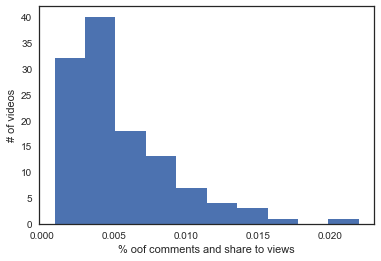

In [241]:
describe_data(comments_shares_to_views_list, '% oof comments and share to views', '# of videos')


In [243]:

d.to_csv('videos_modified.csv')